In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## Train dataset


In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

train_original=train.copy()

In [3]:
print(train)

          id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]


In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Test datset

In [5]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

test_original=test.copy()

In [6]:
print(test)

          id                                              tweet
0      31963  #studiolife #aislife #requires #passion #dedic...
1      31964   @user #white #supremacists want everyone to s...
2      31965  safe ways to heal your #acne!!    #altwaystohe...
3      31966  is the hp and the cursed child book up for res...
4      31967    3rd #bihday to my amazing, hilarious #nephew...
...      ...                                                ...
17192  49155  thought factory: left-right polarisation! #tru...
17193  49156  feeling like a mermaid ð #hairflip #neverre...
17194  49157  #hillary #campaigned today in #ohio((omg)) &am...
17195  49158  happy, at work conference: right mindset leads...
17196  49159  my   song "so glad" free download!  #shoegaze ...

[17197 rows x 2 columns]


In [7]:
print(test.head())

      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


## DATA PREPROCESSING

In [8]:
#combining the train and test csv files using append() function

combine = train.append(test, ignore_index = True, sort = True)

C:\Users\addar\AppData\Local\Temp\ipykernel_7984\3811194088.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine = train.append(test, ignore_index = True, sort = True)


In [9]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [10]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


### Removing twitter handles (@user)


In [11]:
def remove_pattern(text,pattern):
    
    # re.findall() --> Finds the pattern like @ and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() --> removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [12]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [13]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z]"," ")

combine.head(10)


C:\Users\addar\AppData\Local\Temp\ipykernel_7984\4172507037.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z]"," ")


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so gr


In [14]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

combine.head(11)


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cause they offer wheelchair...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that s...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [15]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

tokenized_tweet.head()


0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, lyft, credit, cause, they, offer, whe...
2                              [bihday, your, majesty]
3                      [model, love, take, with, time]
4                    [factsguide, society, motivation]
Name: Tidy_Tweets, dtype: object

In [16]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head(11)

0     [when, father, dysfunct, selfish, drag, kid, i...
1     [thank, lyft, credit, caus, they, offer, wheel...
2                               [bihday, your, majesti]
3                       [model, love, take, with, time]
4                           [factsguid, societi, motiv]
5     [huge, fare, talk, befor, they, leav, chao, di...
6                               [camp, tomorrow, danni]
7     [next, school, year, year, exam, think, about,...
8     [love, land, allin, cav, champion, cleveland, ...
9                                        [welcom, here]
10    [ireland, consum, price, index, climb, from, p...
Name: Tidy_Tweets, dtype: object

In [17]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank lyft credit caus they offer wheelchair v...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi motiv


In [19]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     -------------- ----------------------- 245.8/636.8 kB 7.6 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 6.7 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'

In [ ]:
def calculate_sentiment_scores(text):
    sentiment_scores = []
    for tweet in text:
        blob = TextBlob(tweet)
        sentiment_scores.append(blob.sentiment.polarity)
    return sentiment_scores

In [47]:
sentiment_scores = calculate_sentiment_scores(combine['Tidy_Tweets'])
combine['Sentiment_Score'] = sentiment_scores

combine.head(10)

,id,label,tweet,Tidy_Tweets,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...,-0.3,0.535417,-0.3
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cau they offer wheelchair v...,0.0,0.000000,0.0
2,3,0.0,bihday your majesty,bihday your majesti,0.0,0.000000,0.0
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time,0.5,0.600000,0.5
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv,0.0,0.000000,0.0
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talk befor they leav chao disput whe...,0.4,0.900000,0.4
6,7,0.0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni,0.0,0.000000,0.0
7,8,0.0,the next school year is the year for exams.ð...,next school year year exam think about that #s...,-0.4,0.450000,-0.4
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cav #champion #cleveland #cl...,0.5,0.600000,0.5
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcom here,0.0,0.000000,0.0


In [39]:
positive_count = len(combine[combine['Sentiment_Score'] > 0])
negative_count = len(combine[combine['Sentiment_Score'] < 0])
neutral_count = len(combine[combine['Sentiment_Score'] == 0])

sentiment_counts = [positive_count, negative_count, neutral_count]
sentiment_labels = ['Positive', 'Negative', 'Neutral']
colors = ['green', 'red', 'gray']

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_labels, colors=colors, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


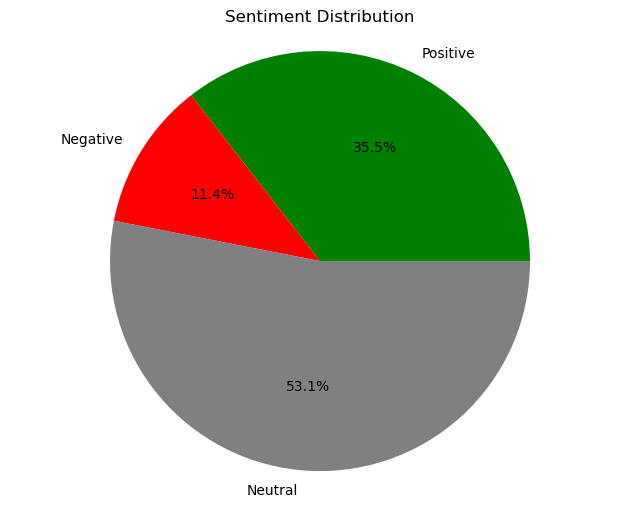

In [45]:
positive_count = len(combine[combine['Sentiment_Score'] > 0])
negative_count = len(combine[combine['Sentiment_Score'] < 0])
neutral_count = len(combine[combine['Sentiment_Score'] == 0])

sentiment_counts = [positive_count, negative_count, neutral_count]
sentiment_labels = ['Positive', 'Negative', 'Neutral']
colors = ['green', 'red', 'gray']

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_labels, colors=colors, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


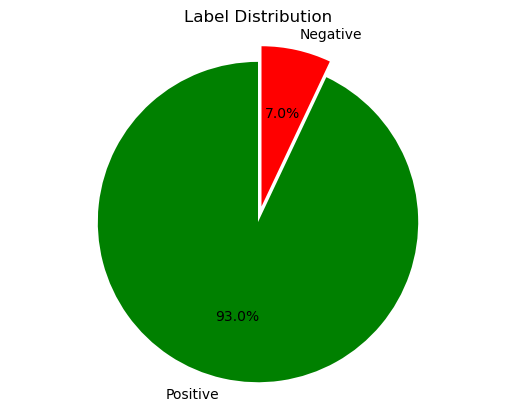

In [48]:
positive_count = len(combine[combine['label'] == 0])
negative_count = len(combine[combine['label'] == 1])

labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
colors = ['green', 'red']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Label Distribution')
plt.show()